## Observations and Insights 

Each drug regimen had a similar total number of timepoints except Capomulin and Ramicane which had slightly more and Propriva which had fewer.
The sex of the mice was relatively evenly distributed with 51% being male and 49% female.

Looking at the data for mice on the drug regimens Capomulin, Ramicane, Infubinol, and Ceftamin, we can see that Capomulin 
and Ramicane mice on average had a lower final Tumour Volume than those on Infubinol and Cefamin.

Mouse s185, a mouse on Capomulin, showed a significant reduction in Tumour Volume over time.

There is a strong positive correlation between average Tumour Volume and Weight of the mouse, possibly indicating larger/heavier mice grow larger tumours.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_df = mouse_metadata.merge(study_results, how = 'outer', on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID']=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
gr = clean_df.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grmean = gr['Tumor Volume (mm3)'].mean()
grmed = gr['Tumor Volume (mm3)'].median()
grvar = gr['Tumor Volume (mm3)'].var()
grstd = gr['Tumor Volume (mm3)'].std()
grsem = gr['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
grsum_df = pd.DataFrame({'Mean':grmean,'Median':grmed,'Variance':grvar,'Std Dev':grstd,'SEM':grsem})
grsum_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints per Regimen'}, xlabel='Drug Regimen', ylabel='Total No. of Timepoints'>

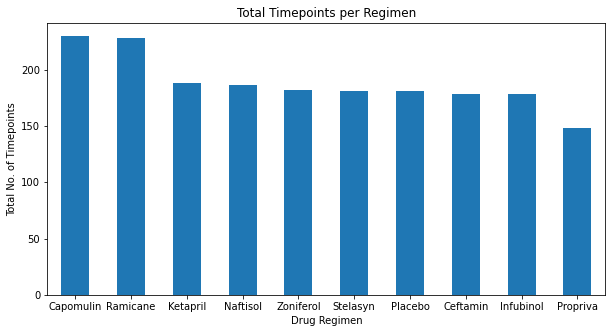

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bardata = clean_df['Drug Regimen'].value_counts()

bardata.plot.bar(title='Total Timepoints per Regimen',xlabel='Drug Regimen', ylabel='Total No. of Timepoints',rot = 0, figsize=(10,5))




Text(0.5, 1.0, 'Total Timepoints per Regimen')

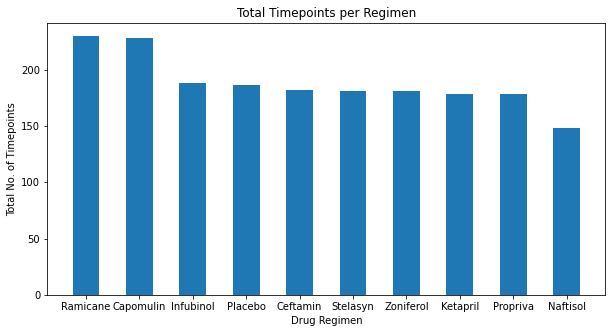

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = clean_df['Drug Regimen'].unique()
plt.figure(figsize = (10, 5))
plt.bar(xaxis,bardata,width = 0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Total No. of Timepoints')
plt.title('Total Timepoints per Regimen')

<AxesSubplot:title={'center':'Distribution of Male vs Female'}, ylabel='Sex'>

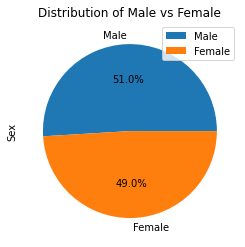

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
piedata =clean_df['Sex'].value_counts()
piedata.plot.pie(title='Distribution of Male vs Female',legend= True,autopct='%1.1f%%')

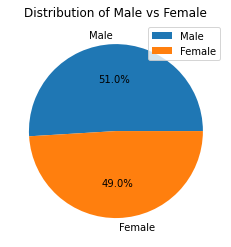

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(piedata,autopct='%1.1f%%',labels=['Male','Female'])
plt.title('Distribution of Male vs Female')
plt.legend()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxmice =clean_df.loc[clean_df.groupby('Mouse ID')['Timepoint'].idxmax()]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

maxmice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tvdata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tvdata.append(maxmice['Tumor Volume (mm3)'].loc[maxmice['Drug Regimen'] == treatment])

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset
    # Determine outliers using upper and lower bounds
for x in range(len(treatments)): 
    quartiles = tvdata[x].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print (f'{treatments[x]}:\nThe lower bound is {lower_bound}, the upper bound is {upper_bound}, the IQR is {iqr}')
    print('Outliers may be:')
    drug_df = maxmice.loc[maxmice['Drug Regimen'] == treatments[x]]
    outlier = drug_df.loc[(drug_df['Tumor Volume (mm3)'] < lower_bound) | (drug_df['Tumor Volume (mm3)'] > upper_bound)]
    if outlier.empty == True:
        print('None')
    else:
        print(outlier)      
    print('\n')    

Capomulin:
The lower bound is 20.70456164999999, the upper bound is 51.83201549, the IQR is 7.781863460000004
Outliers may be:
None


Ramicane:
The lower bound is 17.912664470000003, the upper bound is 54.30681135, the IQR is 9.098536719999998
Outliers may be:
None


Infubinol:
The lower bound is 36.83290494999999, the upper bound is 82.74144559000001, the IQR is 11.477135160000003
Outliers may be:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  


Ceftamin:
The lower bound is 25.355449580000002, the upper bound is 87.66645829999999, the IQR is 15.577752179999997
Outliers may be:
None




Text(0.5, 1.0, 'Final Tumour Volume by Drug Regimen')

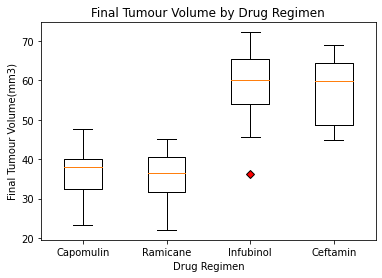

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(tvdata, showfliers = True, labels =treatments, flierprops=red_diamond)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumour Volume(mm3)')
plt.title('Final Tumour Volume by Drug Regimen')


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

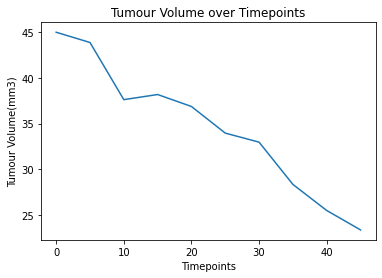

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = clean_df.loc[clean_df['Mouse ID'] == 's185']

xaxis = s185['Timepoint']
yaxis = s185['Tumor Volume (mm3)']

plt.plot(xaxis,yaxis)
plt.xlabel('Timepoints')
plt.ylabel('Tumour Volume(mm3)')
plt.title('Tumour Volume over Timepoints')

plt.show

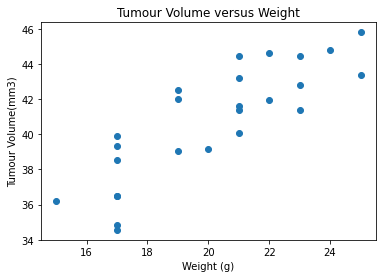

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capom = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avgcap = capom.groupby('Mouse ID').mean()
xaxis = avgcap['Weight (g)']
yaxis = avgcap['Tumor Volume (mm3)']

plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume(mm3)')
plt.title('Tumour Volume versus Weight')

plt.scatter(xaxis,yaxis)

## Correlation and Regression

The correlation coefficient between Weight and Tumour Volume for Capomulin is 0.8419363424694717


<function matplotlib.pyplot.show(close=None, block=None)>

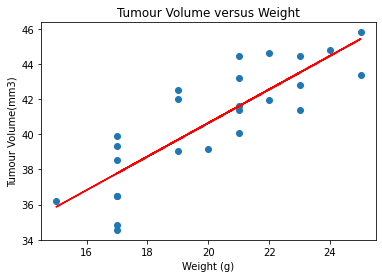

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(xaxis,yaxis)
print (f'The correlation coefficient between Weight and Tumour Volume for Capomulin is {correlation[0]}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume(mm3)')
plt.title('Tumour Volume versus Weight')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show